In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
import seaborn as sns
import warnings
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
dx = pd.read_excel('X_bp.xlsx', index_col=0)
dx.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [3]:
dx.shape

(1023, 10)

In [4]:
ds = pd.read_excel('X_nup.xlsx', index_col=0)
ds.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                   0          4.0               57.0
1                   0          4.0               60.0
2                   0          4.0               70.0
3                   0          5.0               47.0
4                   0          5.0               57.0

In [5]:
ds.shape

(1040, 3)

In [6]:
#По условия задания необходимо объединить две таблицы в одну используя метод Inner
df = dx.join(ds, how='inner') # Объединяем 2 таблицы в одну. 
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

In [7]:
df.shape # смотрим размерность полуенного датасета

(1023, 13)

In [8]:
df.isnull().sum() # смотрим  пропуски в объеденненом датасете

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

<Axes: >

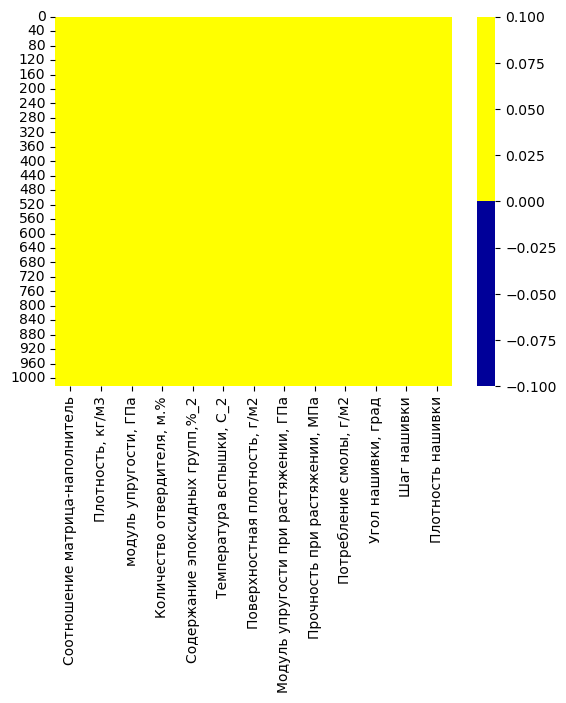

In [9]:
# Удостоверимся в отсутствии пропусков на тепловой карте
cols = df.columns[:13] 
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

Вывод: По полученным результатам видно, что пропуски в датасете отсутствуют

In [10]:
df.info() # выводим информацию пи типам данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

Вывод: В датасете представлены 2 типа данных: float64 и int64 

In [14]:
# Смотрим описательную статистику. Выведем ее в удобном для просмотра ввиде
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

In [15]:
df.median() # найдем медиану для столбцов датасета

Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
Угол нашивки, град                         0.000000
Шаг нашивки                                6.916144
Плотность нашивки                         57.341920
dtype: float64

In [16]:
df.mean() # найдем среднее значение для стобцов датасета

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки, град                        44.252199
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

In [17]:
df.nunique() # выведем количество уникальных значений столцов

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

Вывод: Из результатво видно, что у столбца - "Угол нашивки, град" всего 2 значения. 

In [18]:
df.duplicated() # смотрим дубликаты данных в датасете

0       False
1       False
2       False
3       False
4       False
        ...  
1018    False
1019    False
1020    False
1021    False
1022    False
Length: 1023, dtype: bool

Вывод: дубликатов в датасете нет

array([[<Axes: title={'center': 'Соотношение матрица-наполнитель'}>,
        <Axes: title={'center': 'Плотность, кг/м3'}>,
        <Axes: title={'center': 'модуль упругости, ГПа'}>,
        <Axes: title={'center': 'Количество отвердителя, м.%'}>],
       [<Axes: title={'center': 'Содержание эпоксидных групп,%_2'}>,
        <Axes: title={'center': 'Температура вспышки, С_2'}>,
        <Axes: title={'center': 'Поверхностная плотность, г/м2'}>,
        <Axes: title={'center': 'Модуль упругости при растяжении, ГПа'}>],
       [<Axes: title={'center': 'Прочность при растяжении, МПа'}>,
        <Axes: title={'center': 'Потребление смолы, г/м2'}>,
        <Axes: title={'center': 'Угол нашивки, град'}>,
        <Axes: title={'center': 'Шаг нашивки'}>],
       [<Axes: title={'center': 'Плотность нашивки'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

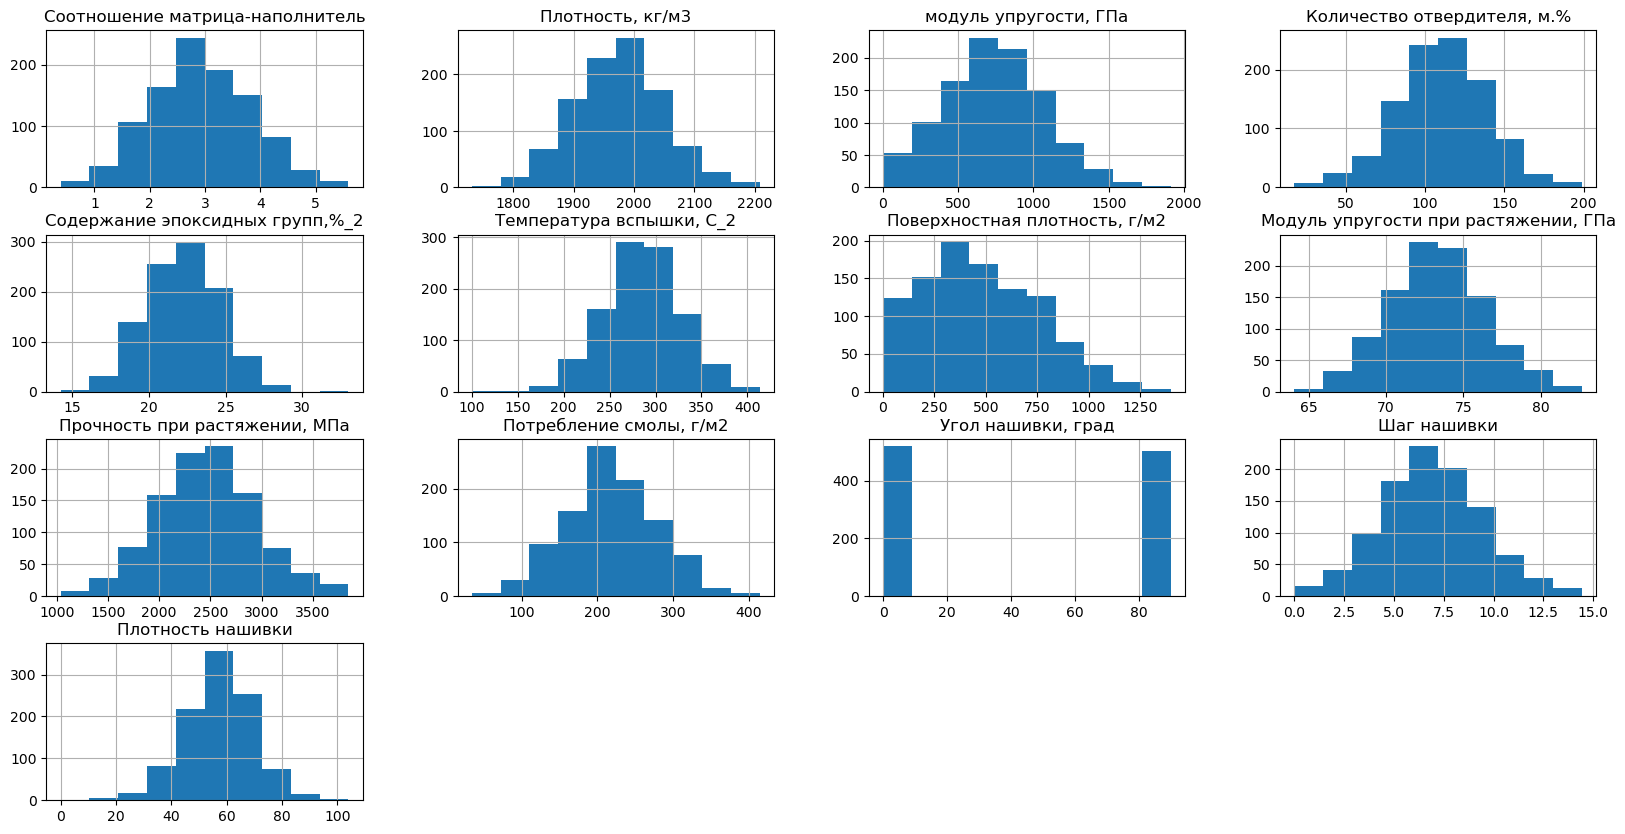

In [19]:
df.hist(figsize=(20,10)) # рисуем гистограммы распеределения переменной

Вывод: Из гистограмм распределения переменной видим, что все переменные кроме "Угол нашивки" имеют нормальное распределение. 

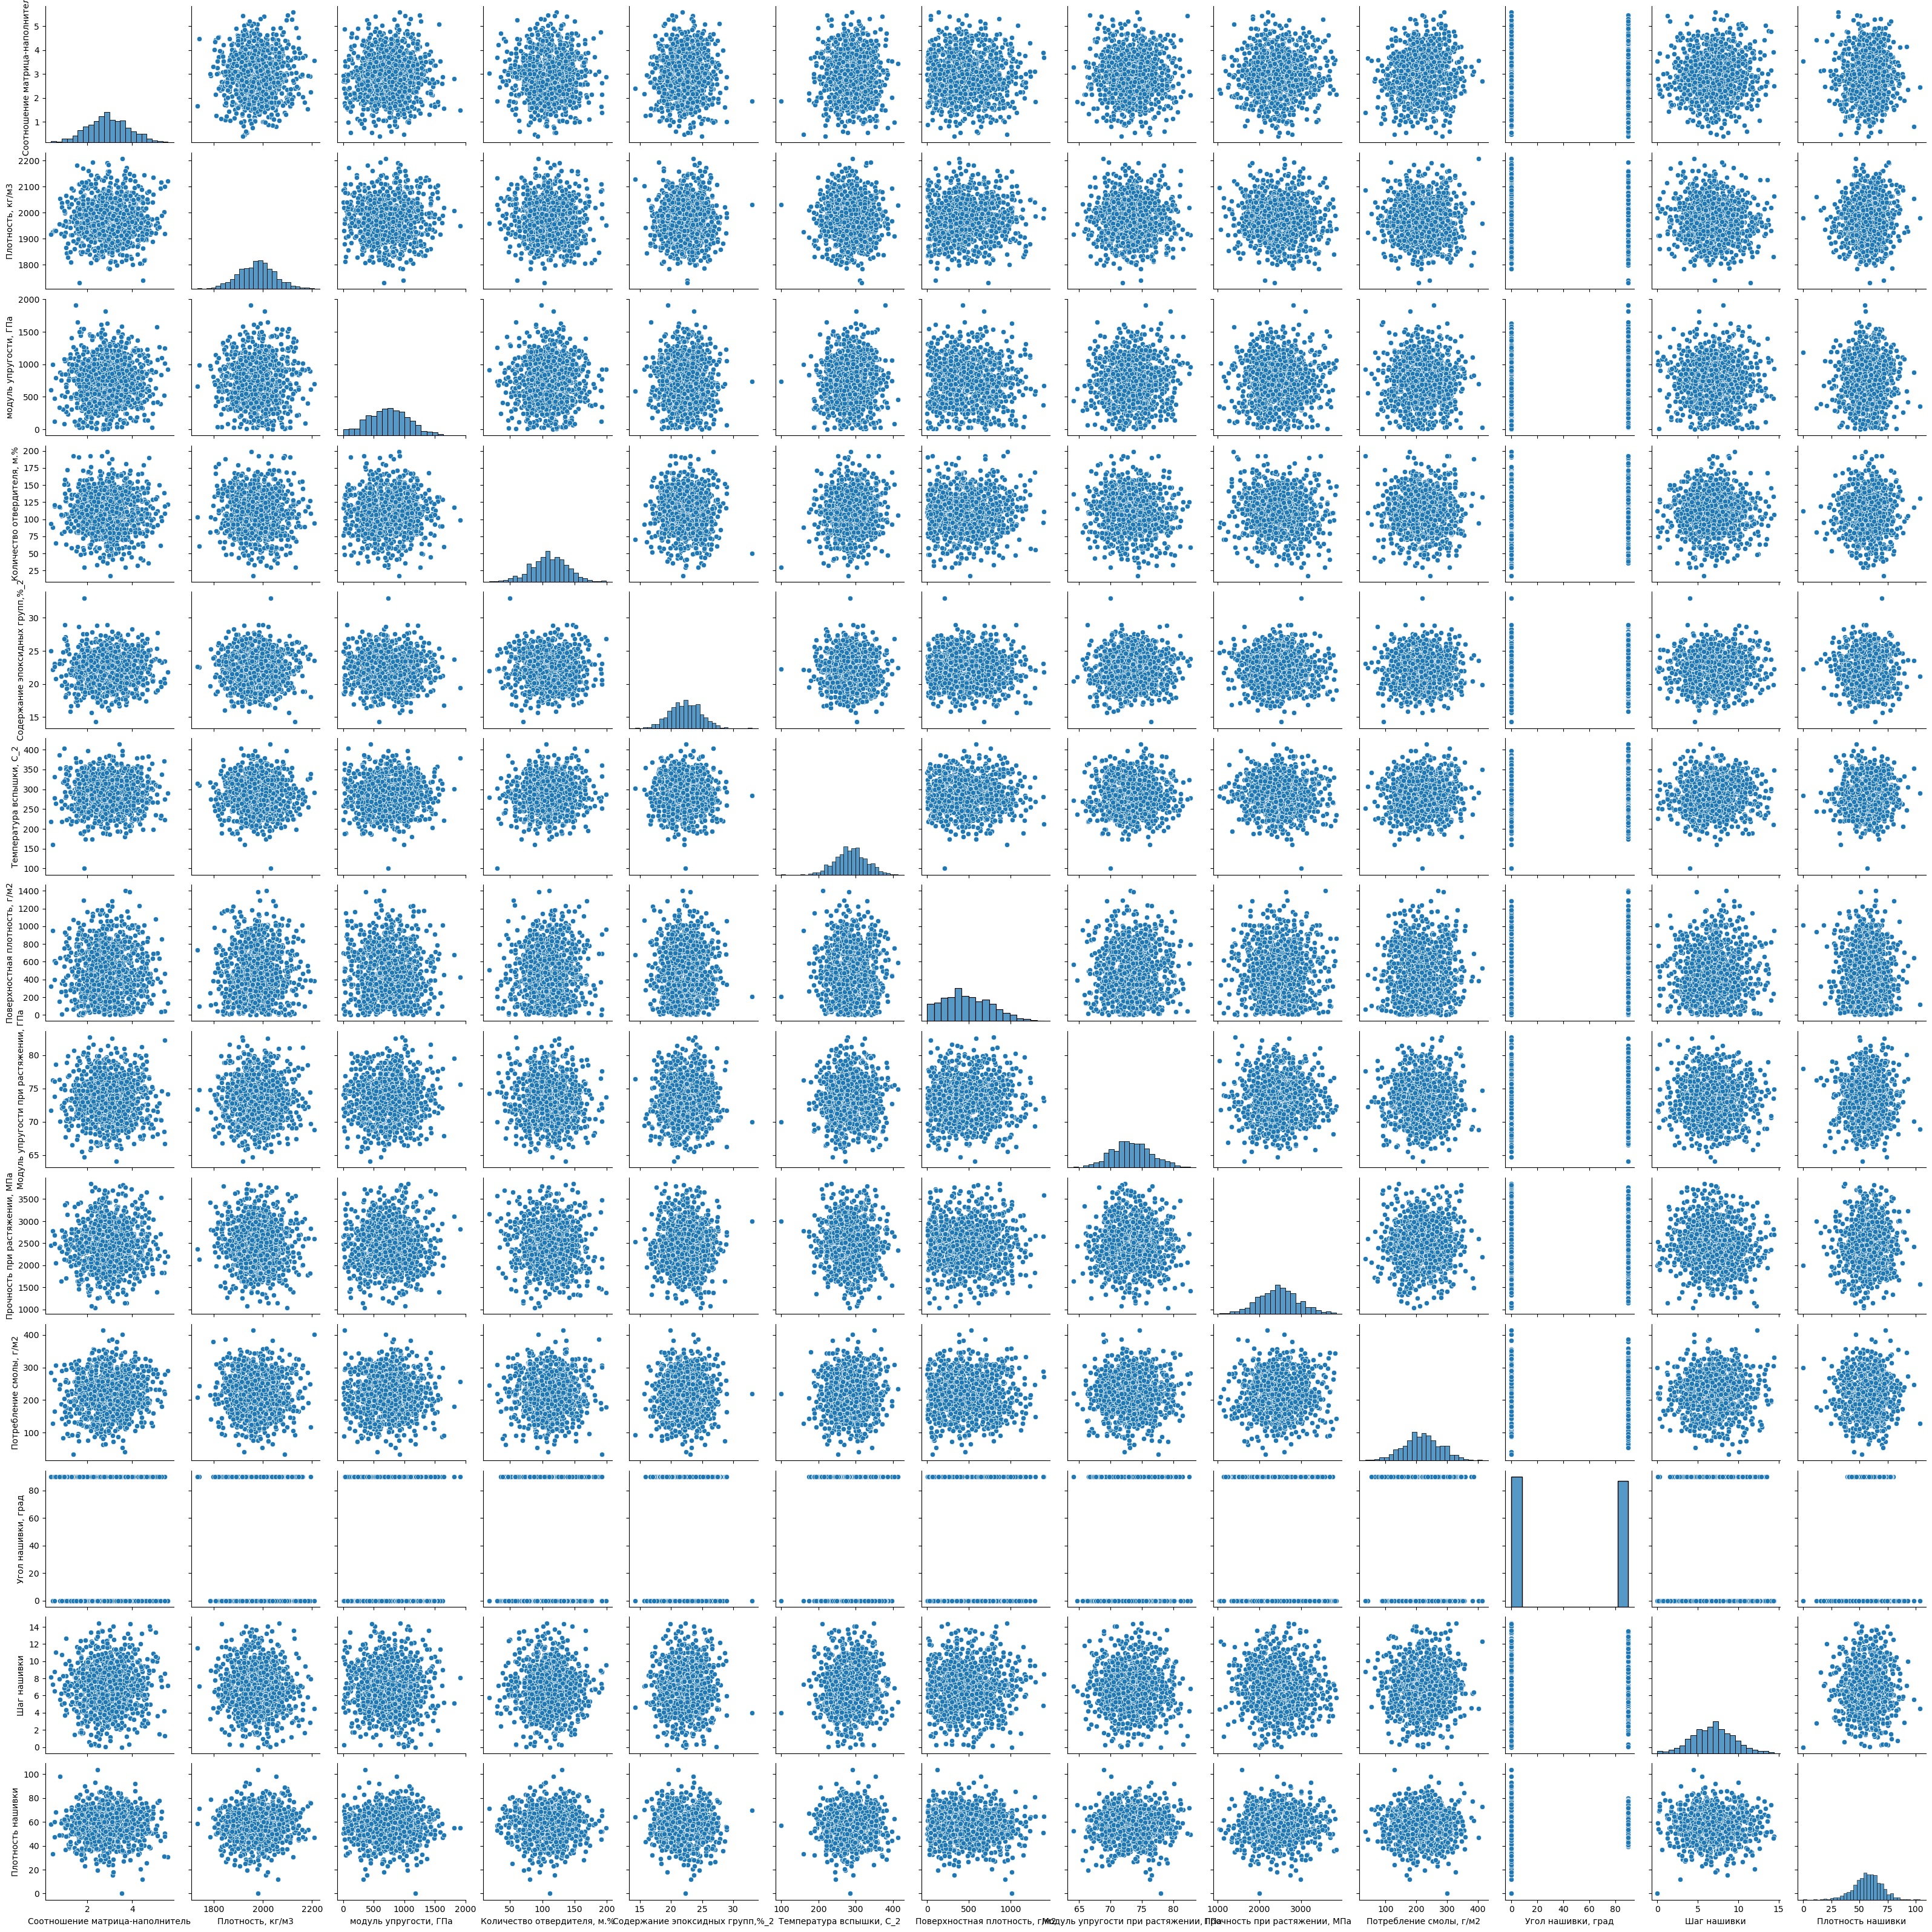

In [20]:
sns.pairplot(df) # рисуем попарные графики рассеяния точек

Из графиков попарного рассеивания видно, что в датасете присутствуют выбросы.
Попробуем построить диаграммы ящика с усами.

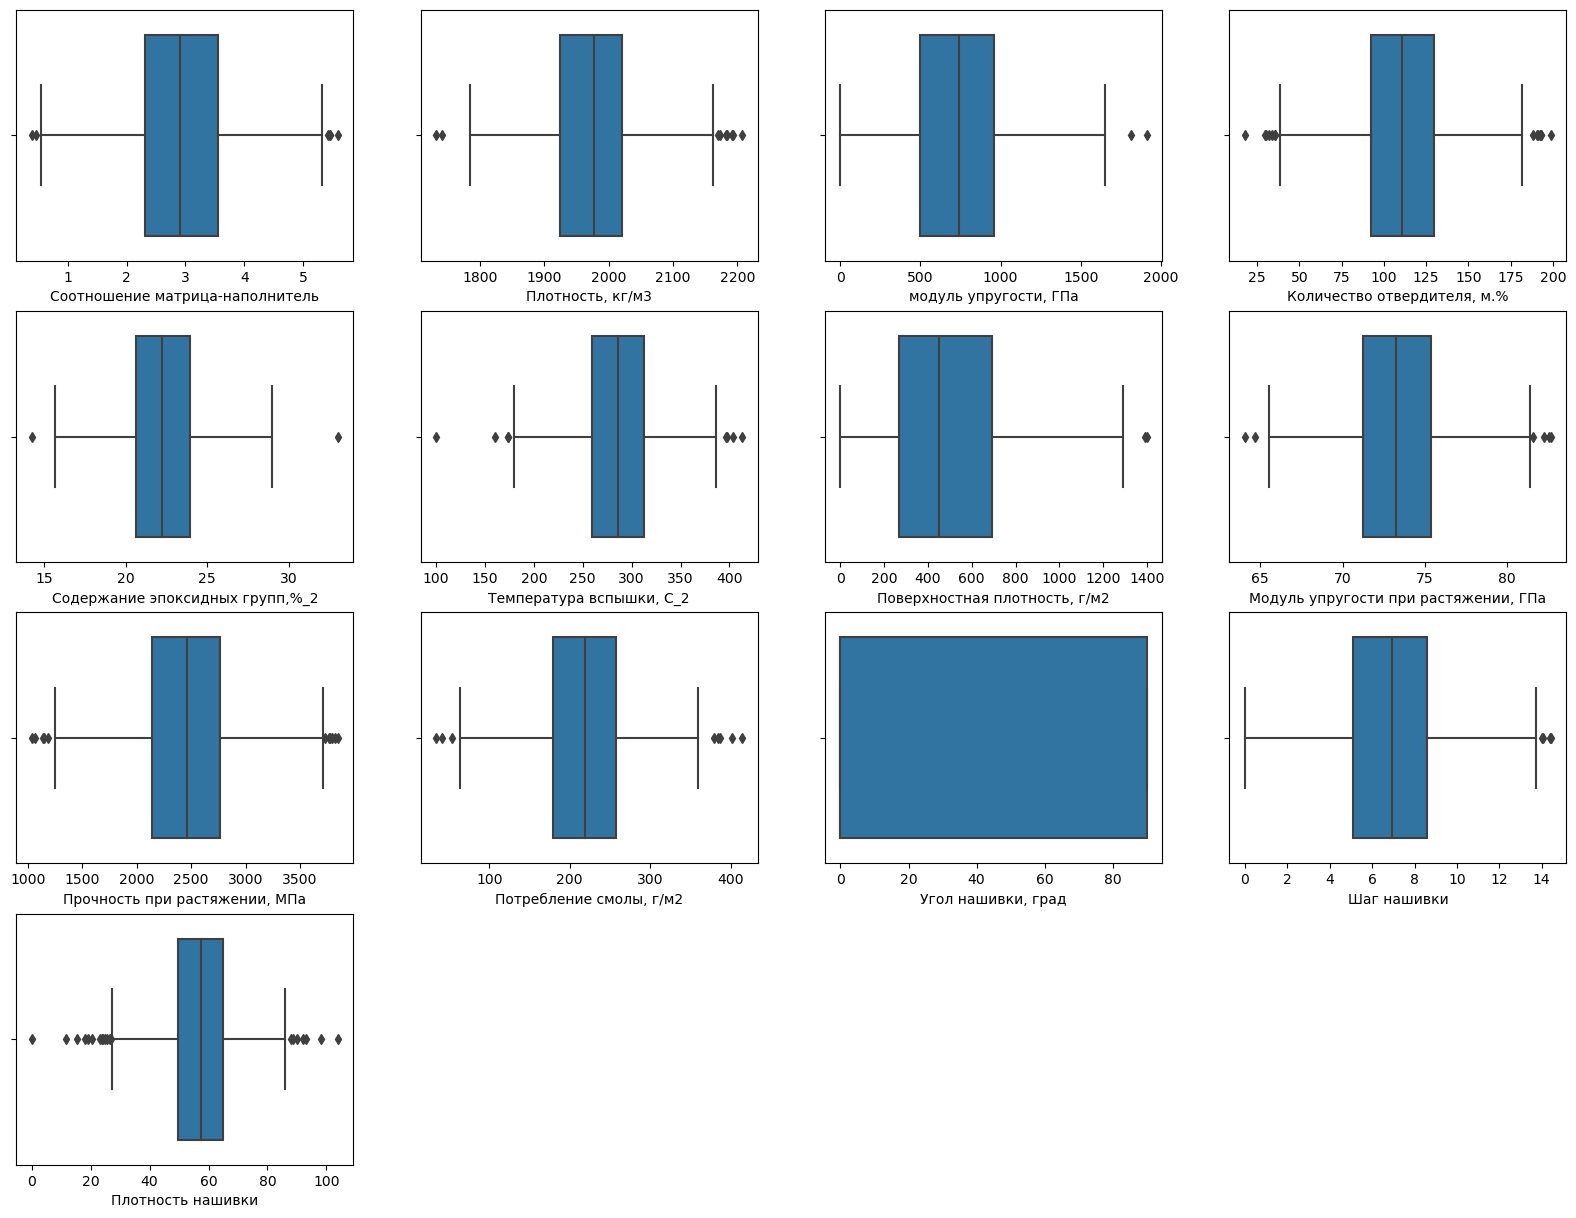

In [21]:
# Для лучшего понимания, выведем графики распределения переменных и "ящики с усами" вместе
fig = plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns):    
    axs=fig.add_subplot(4, 4, i+1)
    sns.boxplot(data=df, x=col)
plt.show()

Выод: из графиков видно, что выбросы имеются во всех столбцах, кроме "Угол нашивки, град". Особенно много в столбце "Плотность нашивки"

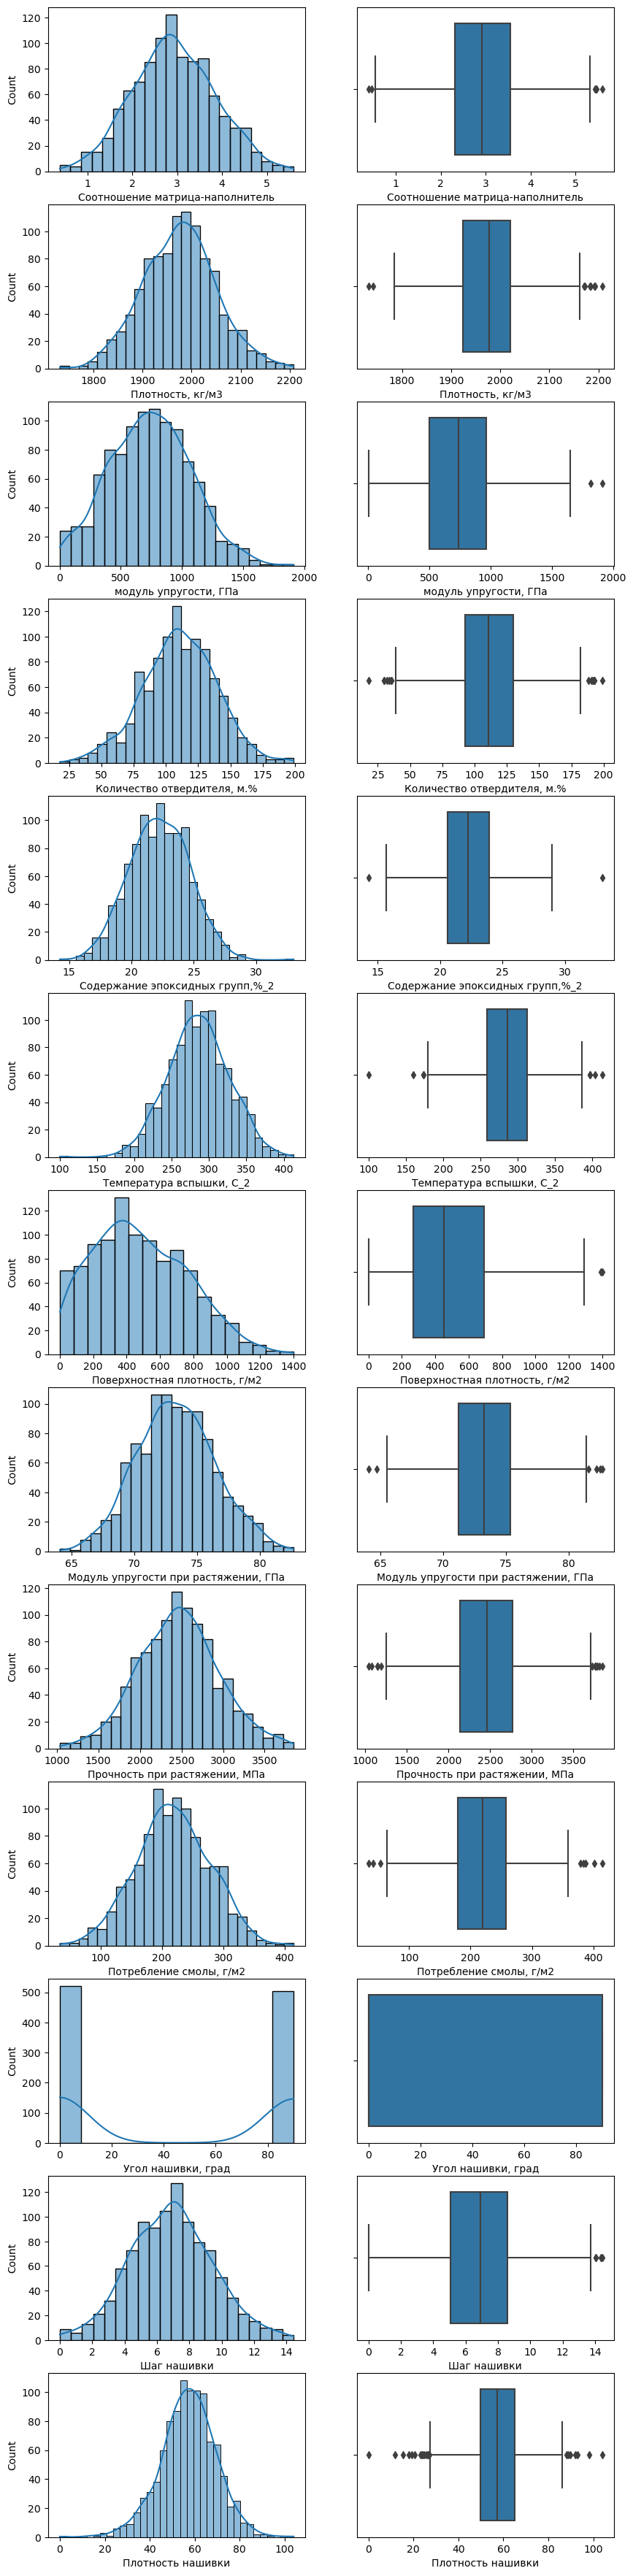

In [22]:
# Для лучшего понимания, выведем графики распределения переменных и "ящики с усами" вместе
fig, axes = plt.subplots(13, 2, figsize=(10, 45))
for i, col in enumerate(df.columns):    
    sns.histplot(data=df, x=col, kde=True, ax=axes[i, 0])
    sns.boxplot(data=df, x=col, ax=axes[i, 1])
plt.show()

Вывод: из графиков попарных рассеиваний точек и графиков "ящиков с усами" видно, что в датасете присутствуют выбросы. Необходимо исследовать данные выбросы

#### Анализ выбросов

Для поиска выбросов будем использовать IsolationForest (изолирующий лес) и метод zscore.

In [23]:
# Сохранием объединенный датасет в новый файл с расширением xlsx
df.to_excel('./X_union.xlsx')

In [24]:
df_copy = df.copy(deep=True) # сделаем копию нашего датасета

Для поиска выбросов сначала будем использовать IsolationForest

In [25]:
# Найдем выбросы с помощью Изолирующего леса
iso = IsolationForest()
iso_outliers = iso.fit_predict(df_copy)

# # Удалим выбросы
for i in range(len(iso_outliers)):
    if iso_outliers[i] == -1:
         df_copy.drop(i, inplace = True)
# # Выведем полуенный результат
df_copy.shape

(938, 13)

Для поиска выбросов еще попробуем метод zscore или 3 сигм.

In [26]:
 # методом 3-х сигм
sigma_3 = 0
for col in df_copy:
    d = df_copy.loc[:, [col]]        
    zscore = (df_copy[col] - df_copy[col].mean()) / df_copy[col].std()
    d['3s'] = zscore.abs() > 3
    sigma_3 += d['3s'].sum()
       
print('Метод 3-х сигм, выбросов:', sigma_3)


Метод 3-х сигм, выбросов: 24


In [27]:
# удаление выбросов
z = np.abs(stats.zscore(df_copy))
df_clean = df_copy[(z<3).all(axis=1)]
df_clean.shape

(914, 13)

In [28]:
df_clean.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
1                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   
5                         2.767918            2000.0             748.000000   
6                         2.569620            1910.0             807.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
1                        50.00                        23.750000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   
5                       111.86                        22.267857   
6                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
1                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   
5                284.615385                          210.0   
6                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
1                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   
5                                  70.0                         3000.0   
6                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                    220.0                   0          4.0               60.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0  
5                    220.0                   0          5.0               60.0  
6                    220.0                   0          5.0               70.0

In [29]:
df_clean.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

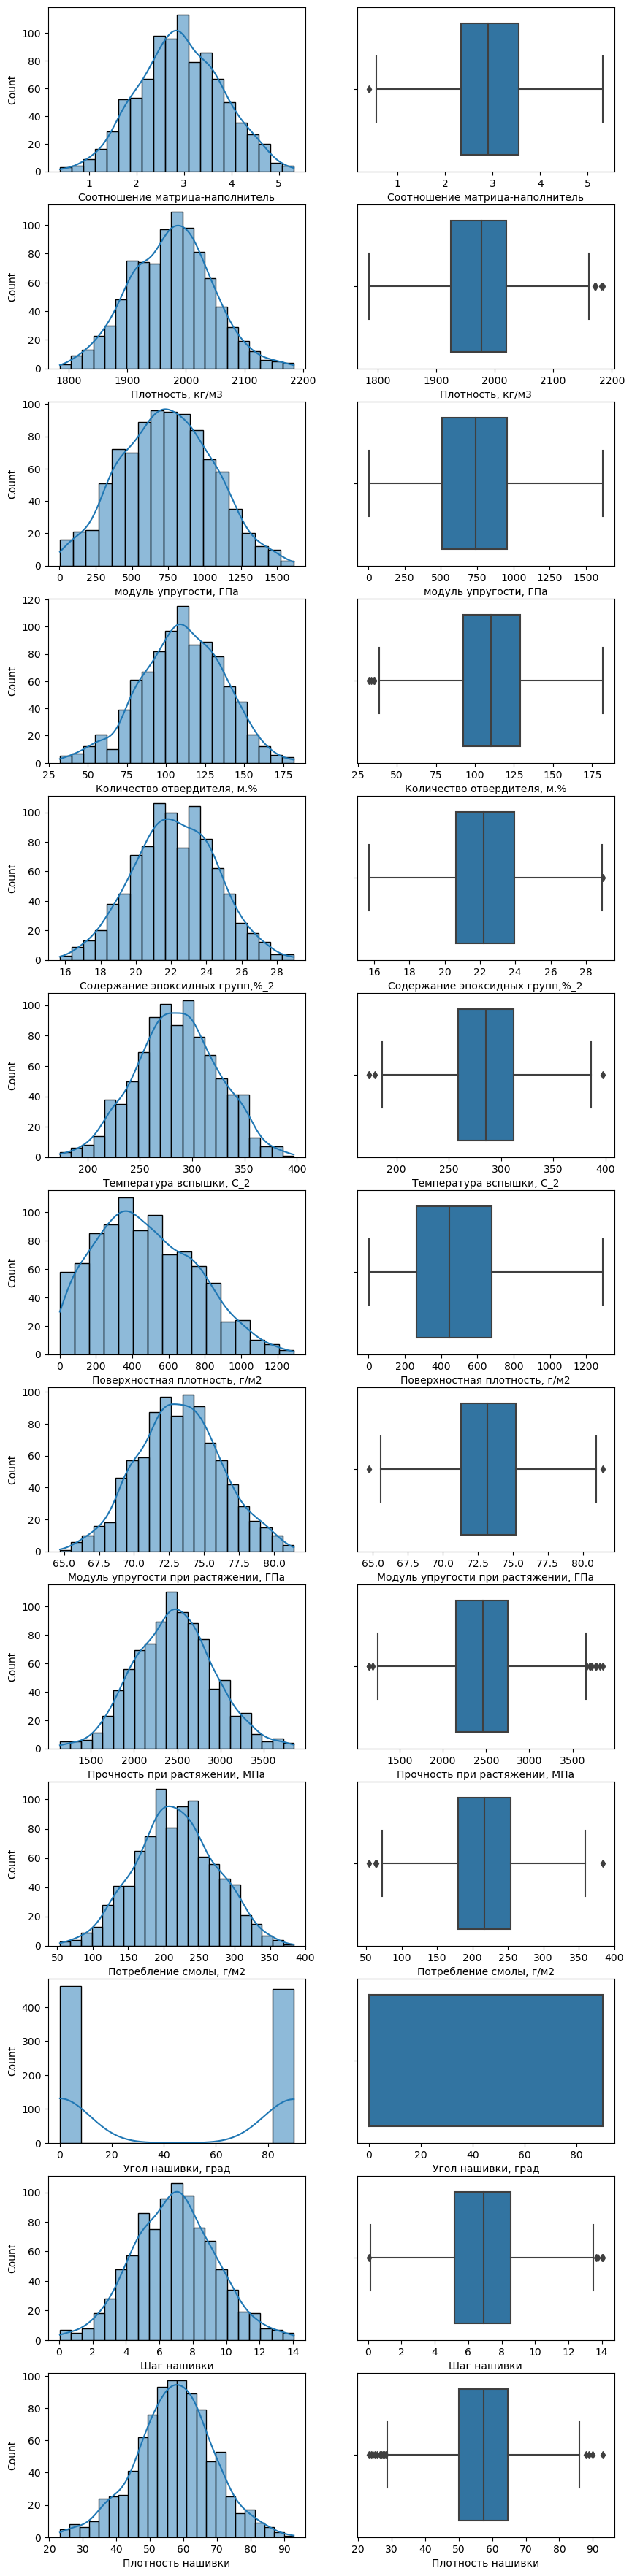

In [30]:
# Выведем графики распределения переменных и "ящики с усами" вместе
fig, axes = plt.subplots(13, 2, figsize=(10, 45))
for i, col in enumerate(df_clean.columns):    
    sns.histplot(data=df_clean, x=col, kde=True, ax=axes[i, 0])
    sns.boxplot(data=df_clean, x=col, ax=axes[i, 1])
plt.show()


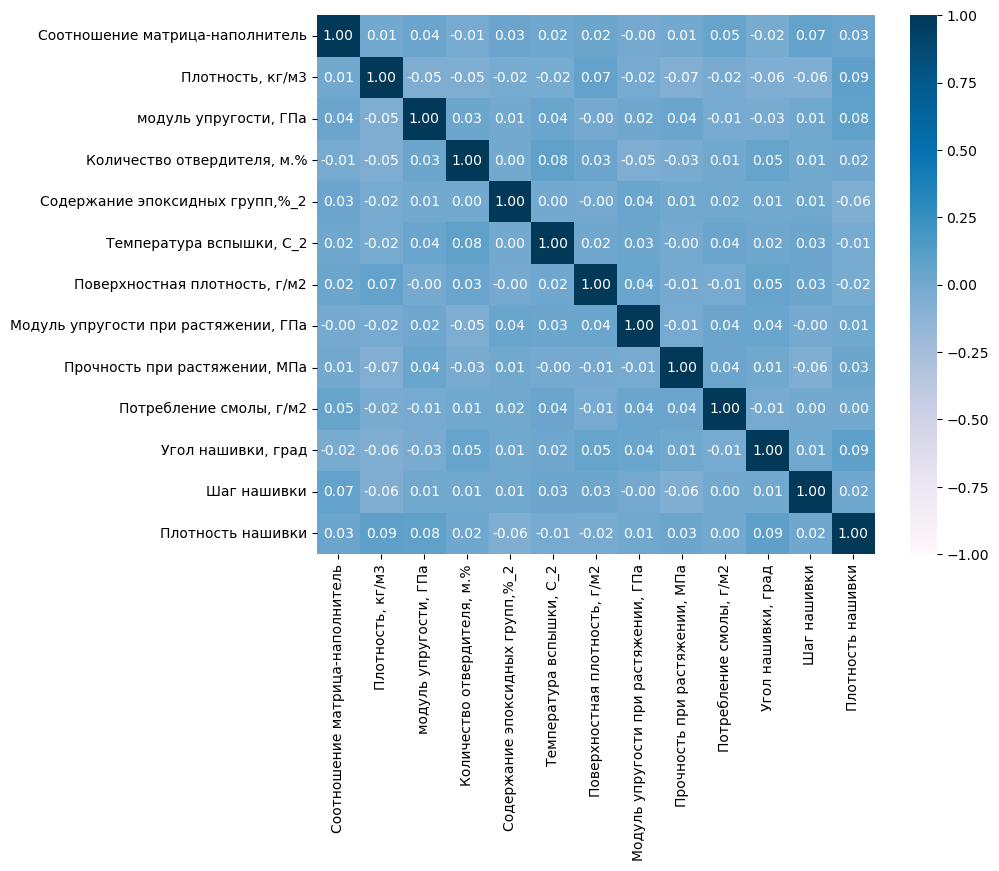

In [31]:
# Рассмотрим матрицу корреляции. Для этого построим тепловую карту
corr = df_clean.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='PuBu', ax=ax)
plt.show()

Выводы: Из тепловой карты видно, что параметры имеют очень слабую корреляцию. Т.е. переменные между собой не взимосвзязаны или имеют очень слабую зависимость.

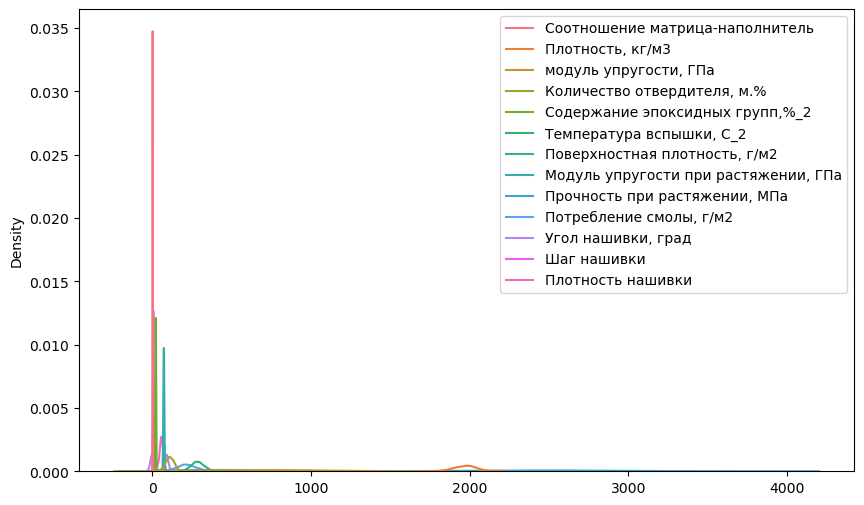

In [32]:
# Построим график оценки плотности расппределения данных
fig = plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_clean)
plt.show()

Вывод: изграфика видно, что данные имеют разный диапазон, поэтому целесообразно для дальнейшей работы провести нормализацию.

In [33]:
# Сохраним очищенные данные
df_clean.to_excel('./X_clean.xlsx')

### Обучение моделей

Обучить нескольких моделей для прогноза:
1. модуля упругости при растяжении 
2. прочности при растяжении. 

При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. 

При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.

In [34]:
# Загрузим наши сохраненные данные
df = pd.read_excel('X_clean.xlsx', index_col=0)
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
1                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   
5                         2.767918            2000.0             748.000000   
6                         2.569620            1910.0             807.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
1                        50.00                        23.750000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   
5                       111.86                        22.267857   
6                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
1                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   
5                284.615385                          210.0   
6                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
1                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   
5                                  70.0                         3000.0   
6                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                    220.0                   0          4.0               60.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0  
5                    220.0                   0          5.0               60.0  
6                    220.0                   0          5.0               70.0

In [35]:
# Выведем размерность
df.shape

(914, 13)

In [36]:
# Для удобства работы выведем названия столбцов
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [37]:
# Т.к. Столбец Угол нашивки, град принимает только 2 значения 0 и 90, то закодтруем его с помощию LaLabelEncoder
le = LabelEncoder()
df['Угол нашивки, град'] = le.fit_transform(df['Угол нашивки, град'])
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                           23.750000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
5                       3000.000000               220.000000   
6                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

In [38]:
# Сделаем нормализацию используя MinMaxScaler.
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df), columns = df.columns, index = df.index)
df_norm.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
1                         0.298034          0.613778               0.456575   
3                         0.298034          0.613778               0.456575   
4                         0.483666          0.613778               0.465419   
5                         0.482973          0.538780               0.462319   
6                         0.442707          0.313786               0.498904   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
1                     0.120025                         0.607435   
3                     0.647362                         0.418887   
4                     0.532950                         0.495653   
5                     0.532950                         0.495653   
6                     0.532950                         0.495653   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
1                  0.496858                        0.16223   
3                  0.565642                        0.16223   
4                  0.496858                        0.16223   
5                  0.496858                        0.16223   
6                  0.496858                        0.16223   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
1                              0.317187                       0.686371   
3                              0.317187                       0.686371   
4                              0.317187                       0.686371   
5                              0.317187                       0.686371   
6                              0.317187                       0.686371   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 0.504222                 0.0     0.282748           0.527880  
3                 0.504222                 0.0     0.354107           0.341687  
4                 0.504222                 0.0     0.354107           0.484912  
5                 0.504222                 0.0     0.354107           0.527880  
6                 0.504222                 0.0     0.354107           0.671105

In [39]:
# Посмотрим описталеьную статистику
df_norm.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель       914.0  0.515120  0.177301  0.0   
Плотность, кг/м3                      914.0  0.475533  0.173406  0.0   
модуль упругости, ГПа                 914.0  0.456954  0.194604  0.0   
Количество отвердителя, м.%           914.0  0.521018  0.176562  0.0   
Содержание эпоксидных групп,%_2       914.0  0.491787  0.177036  0.0   
Температура вспышки, С_2              914.0  0.500962  0.174531  0.0   
Поверхностная плотность, г/м2         914.0  0.366723  0.210427  0.0   
Модуль упругости при растяжении, ГПа  914.0  0.510819  0.178124  0.0   
Прочность при растяжении, МПа         914.0  0.489482  0.170069  0.0   
Потребление смолы, г/м2               914.0  0.493889  0.171095  0.0   
Угол нашивки, град                    914.0  0.495624  0.500255  0.0   
Шаг нашивки                           914.0  0.488689  0.176019  0.0   
Плотность нашивки                     914.0  0.489314  0.166684  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.395797  0.511582  0.641266  1.0  
Плотность, кг/м3                      0.351242  0.482791  0.587764  1.0  
модуль упругости, ГПа                 0.314631  0.457576  0.591392  1.0  
Количество отвердителя, м.%           0.404102  0.523441  0.647362  1.0  
Содержание эпоксидных групп,%_2       0.371716  0.489801  0.622717  1.0  
Температура вспышки, С_2              0.383251  0.500304  0.620052  1.0  
Поверхностная плотность, г/м2         0.205331  0.344116  0.524259  1.0  
Модуль упругости при растяжении, ГПа  0.393938  0.508075  0.627351  1.0  
Прочность при растяжении, МПа         0.372234  0.487135  0.595075  1.0  
Потребление смолы, г/м2               0.382203  0.493799  0.608199  1.0  
Угол нашивки, град                    0.000000  0.000000  1.000000  1.0  
Шаг нашивки                           0.365153  0.491272  0.607180  1.0  
Плотность нашивки                     0.386571  0.492746  0.593425  1.0

Вывод: Из таблицы видно, что нормализация прошла успешно

На всякий случай, посмотрим еще корреляцию

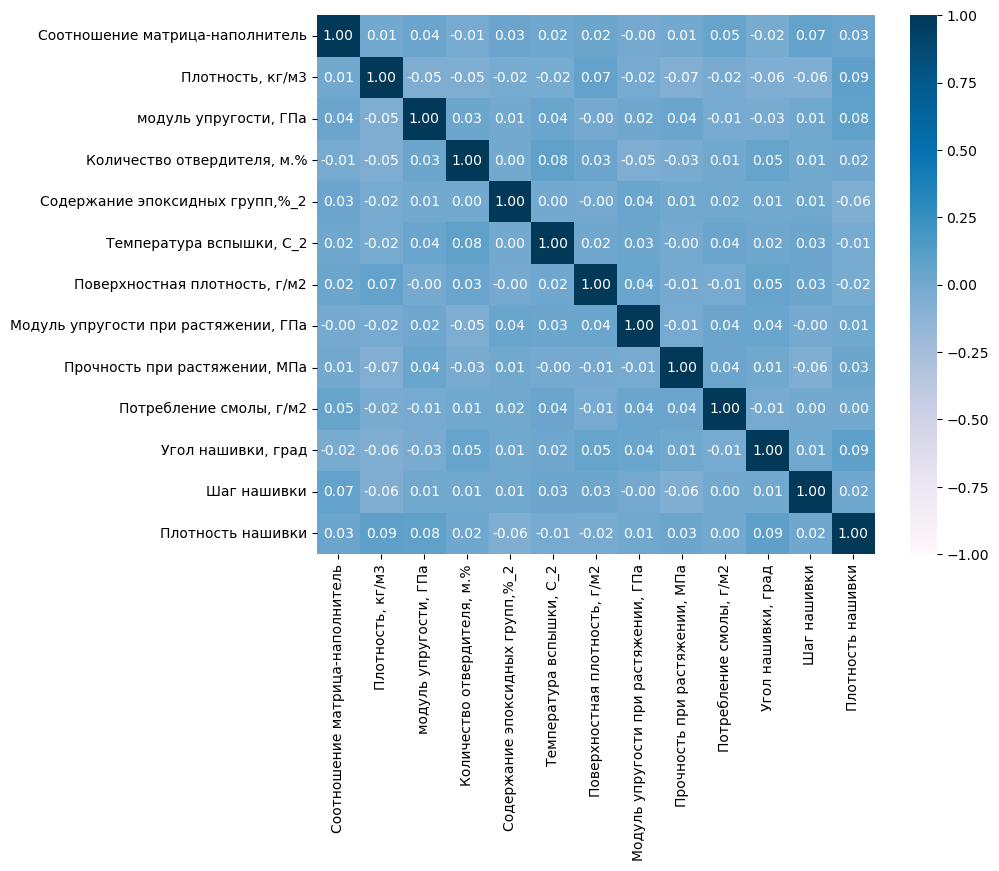

In [40]:
corr = df_norm.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='PuBu', ax=ax)
plt.show()

Вывод: корреляция между признаками так и осталась очень слабой

### Обучение нескольких моделей для прогноза модуля упругости при растяжении 

In [41]:
# Добавим необходимы импорты
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, BayesianRidge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, MinMaxScaler


In [42]:
# сделаем копию датасета для первой задачи (прогноз модуля упругости при растяжении)
model_upr = df_norm.copy()

In [43]:
# Разделим датасет для - Модуля упругости при растяжении.
X_upr = model_upr.drop('Модуль упругости при растяжении, ГПа', axis=1)
y_upr = model_upr['Модуль упругости при растяжении, ГПа']

In [44]:
# Разделим датасет на тренировочную и тестовую выборки.
X_upr_train, X_upr_test, y_upr_train, y_upr_test = train_test_split(X_upr, y_upr, test_size=0.3, random_state=42)

In [45]:
# Посмотрим как разделидся датасет
print(X_upr_test.shape)
print(X_upr_train.shape)
print(y_upr_test.shape)
print(y_upr_train.shape)

(275, 12)
(639, 12)
(275,)
(639,)


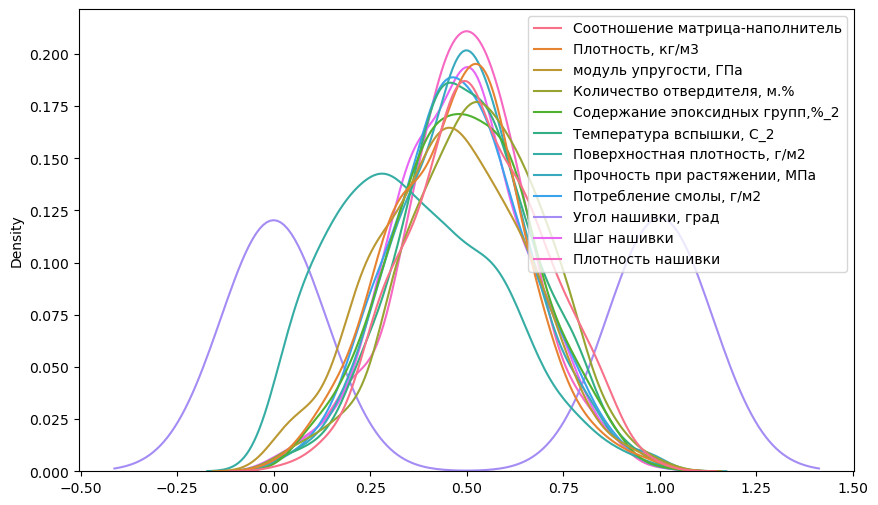

In [46]:
# Построим график оценки плотности расппределения данных после нормализации
fig = plt.figure(figsize=(10, 6))
sns.kdeplot(data=X_upr_train)
plt.show()

Вывод: Из графика видно, что после нормализации данные находятся в одно  диапазоне

In [47]:
# Выведем описательную статистику X_upr_train
X_upr_train.describe().T

count      mean       std       min  \
Соотношение матрица-наполнитель  639.0  0.524566  0.176614  0.032081   
Плотность, кг/м3                 639.0  0.473024  0.173077  0.000000   
модуль упругости, ГПа            639.0  0.457768  0.192539  0.001180   
Количество отвердителя, м.%      639.0  0.525198  0.179952  0.000000   
Содержание эпоксидных групп,%_2  639.0  0.490281  0.176960  0.026629   
Температура вспышки, С_2         639.0  0.503053  0.173777  0.000000   
Поверхностная плотность, г/м2    639.0  0.366362  0.209278  0.000825   
Прочность при растяжении, МПа    639.0  0.491280  0.171836  0.000000   
Потребление смолы, г/м2          639.0  0.482726  0.173081  0.000000   
Угол нашивки, град               639.0  0.502347  0.500386  0.000000   
Шаг нашивки                      639.0  0.484823  0.174351  0.000000   
Плотность нашивки                639.0  0.494308  0.163329  0.036371   

                                      25%       50%       75%       max  
Соотношение матрица-наполнитель  0.406138  0.516038  0.647844  1.000000  
Плотность, кг/м3                 0.349173  0.484803  0.583059  1.000000  
модуль упругости, ГПа            0.322869  0.459021  0.591558  1.000000  
Количество отвердителя, м.%      0.404251  0.528263  0.649593  1.000000  
Содержание эпоксидных групп,%_2  0.368588  0.491015  0.619363  1.000000  
Температура вспышки, С_2         0.391858  0.500207  0.621207  1.000000  
Поверхностная плотность, г/м2    0.202196  0.343908  0.521838  1.000000  
Прочность при растяжении, МПа    0.373641  0.488375  0.594950  1.000000  
Потребление смолы, г/м2          0.365974  0.480571  0.591791  1.000000  
Угол нашивки, град               0.000000  1.000000  1.000000  1.000000  
Шаг нашивки                      0.364615  0.486883  0.594113  0.998704  
Плотность нашивки                0.394291  0.498085  0.598704  1.000000

In [48]:
# Напишем функцию для расчёта метрик.
def func_metrics(models, x, y):
    stat = pd.DataFrame() 
    cv = KFold(10, shuffle=True, random_state=42) 
    scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_squared_log_error']  
    for model_name, model in models.items():
        scores = cross_validate(model, x, y, cv=cv, scoring=scoring)
        # сохраняем среднии значения метрик.
        stat.loc[model_name, 'R2'] = scores['test_r2'].mean()
        stat.loc[model_name, 'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        stat.loc[model_name, 'MAE'] = scores['test_neg_mean_absolute_error'].mean()
        stat.loc[model_name, 'MSLE'] = scores['test_neg_mean_squared_log_error'].mean()
    return stat

In [49]:
# Сравнение моделей с параметрами по умолчанию
models_d = {
    'Lasso': Lasso(),
    'LinearRegression': LinearRegression(),
    'BayesianRidge': BayesianRidge(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
}
stat_d = func_metrics(models_d, X_upr_train, y_upr_train)
stat_d

R2      RMSE       MAE      MSLE
Lasso                     -0.007955 -0.179417 -0.144730 -0.014487
LinearRegression          -0.039781 -0.182213 -0.146974 -0.014923
BayesianRidge             -0.008628 -0.179479 -0.144797 -0.014496
DecisionTreeRegressor     -1.062567 -0.255883 -0.207308 -0.029631
GradientBoostingRegressor -0.114790 -0.188635 -0.150845 -0.016032
RandomForestRegressor     -0.059158 -0.183990 -0.147301 -0.015247

#### Лассо

In [50]:
lasso = Lasso()
lasso.fit(X_upr_train, y_upr_train)
predictions_l = lasso.predict(X_upr_test)

parametrs = [
  {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.095, 0.1, 0.150, 0.2, 0.5, 1]
  }
]
grid = GridSearchCV(lasso, parametrs, cv=10)
grid.fit(X_upr_train, y_upr_train)
l = grid.best_params_
l

{'alpha': 0.01}

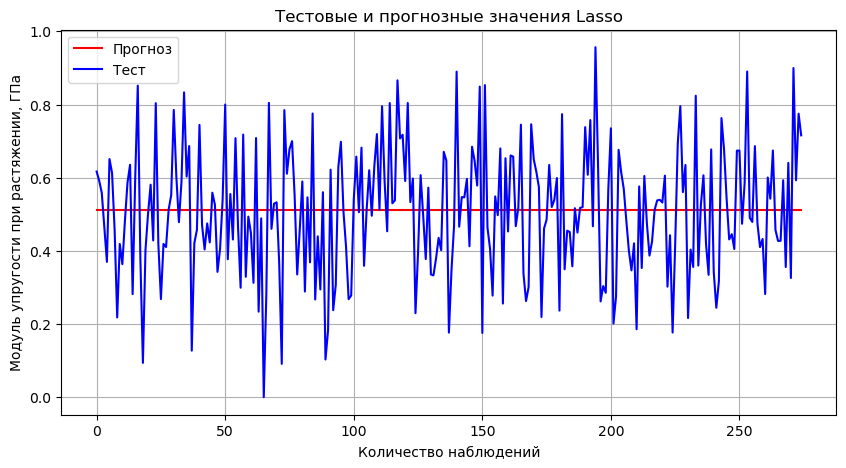

In [57]:
plt.figure(figsize = (10, 5))
plt.title("Тестовые и прогнозные значения Lasso")
plt.plot(predictions_l, label = "Прогноз", color='red')
plt.plot(y_upr_test.values, label = "Тест", color='blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

#### Линейная регрессия

In [52]:
# Посмотрим на линейную регрессию
linear_regression = LinearRegression()
linear_regression.fit(X_upr_train, y_upr_train)
predictions_lr = linear_regression.predict(X_upr_test)

parametrs = {'fit_intercept':[True,False]}

grid = GridSearchCV(linear_regression, parametrs, cv=10)
grid.fit(X_upr_train, y_upr_train)
lr = grid.best_params_
lr

{'fit_intercept': True}

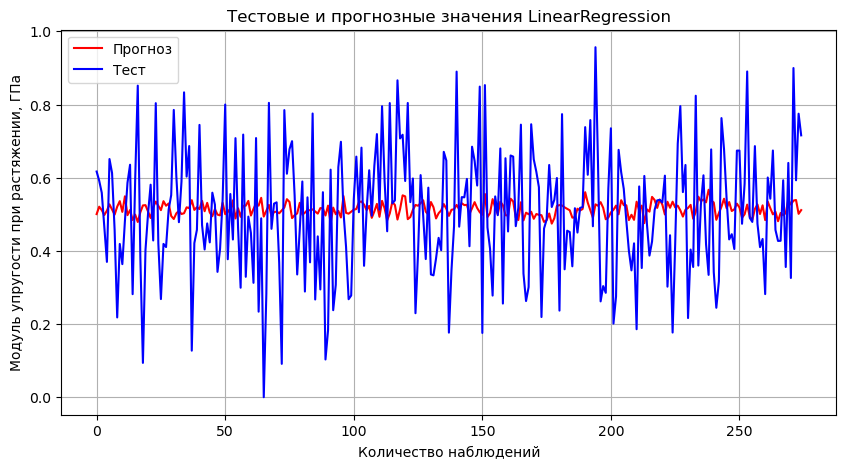

In [56]:
plt.figure(figsize = (10, 5))
plt.title("Тестовые и прогнозные значения LinearRegression")
plt.plot(predictions_lr, label = "Прогноз", color='red')
plt.plot(y_upr_test.values, label = "Тест", color='blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

#### Байесовская регрессия

In [54]:
bayes_regression = BayesianRidge()
bayes_regression.fit(X_upr_train, y_upr_train)
predictions_b = bayes_regression.predict(X_upr_test)

parametrs = { 'alpha_1': np.linspace(0.01, 2, 20), # параметр формы для гамма-распределения
            'alpha_2': np.linspace(0.01, 2, 20), # параметр обратного масштаба (параметр скорости) для гамма-распределения
            'lambda_1':[0.01, 0.1, 1], # параметр формы для гамма-распределения
            'lambda_2':[0.01, 0.1, 1]} # параметр обратного масштаба (параметр скорости) для гамма-распределения

grid = GridSearchCV(bayes_regression, parametrs, cv=10)
grid.fit(X_upr_train, y_upr_train)
br = grid.best_params_
br

{'alpha_1': 0.01, 'alpha_2': 2.0, 'lambda_1': 1, 'lambda_2': 0.01}

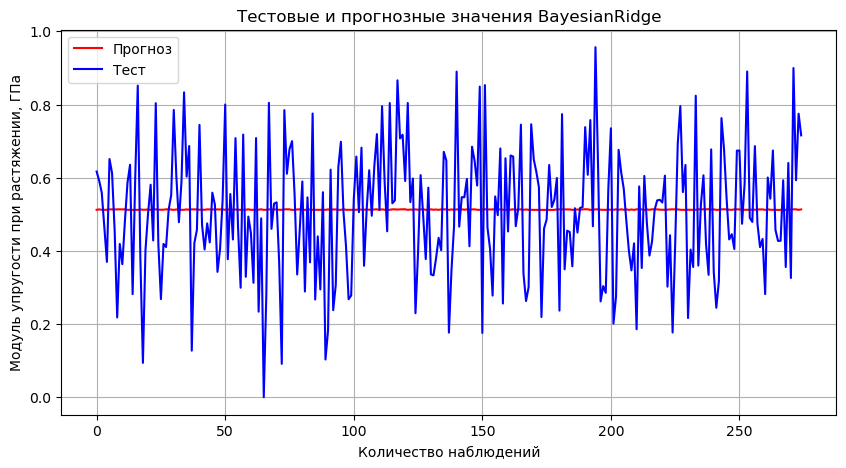

In [60]:
plt.figure(figsize = (10, 5))
plt.title("Тестовые и прогнозные значения BayesianRidge")
plt.plot(predictions_b, label = "Прогноз", color='red')
plt.plot(y_upr_test.values, label = "Тест", color='blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

#### Дерево решений

In [61]:
dt_regression = DecisionTreeRegressor()
dt_regression.fit(X_upr_train, y_upr_train)
predictions_dtr = dt_regression.predict(X_upr_test)

parametrs = {'max_depth': np.arange(1, 10), # Максимальная глубина дерева.
            'min_samples_leaf':[1, 2, 4, 6], # Минимальное количество выборок, необходимое для конечного узла.
            'min_samples_split':[2,4,6],} # Минимальное количество выборок, необходимое для разделения внутреннего узла 
grid = GridSearchCV(dt_regression, parametrs, cv=10)
grid.fit(X_upr_train, y_upr_train)
dtr = grid.best_params_
dtr

{'max_depth': 1, 'min_samples_leaf': 6, 'min_samples_split': 4}

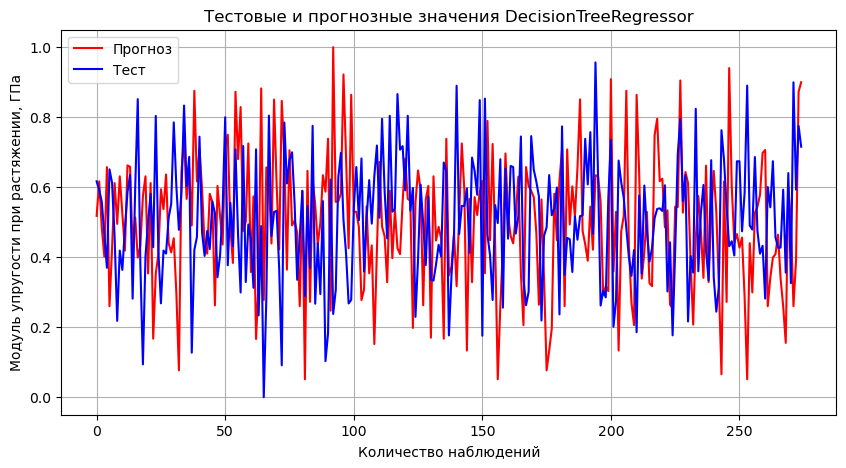

In [63]:
plt.figure(figsize = (10, 5))
plt.title("Тестовые и прогнозные значения DecisionTreeRegressor")
plt.plot(predictions_dtr, label = "Прогноз", color='red')
plt.plot(y_upr_test.values, label = "Тест", color='blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

#### Градиентный бустинг

In [64]:
gb_regression = GradientBoostingRegressor()
gb_regression.fit(X_upr_train, y_upr_train)
predictions_gbr = gb_regression.predict(X_upr_test)

parametrs = {'learning_rate': np.linspace(0.01, 1, 10), # Скорость обучения 
            'n_estimators': np.arange(10, 100, 10), # Количество этапов повышения для выполнения.
            'min_samples_split': [2, 4, 6], # Минимальное количество выборок, необходимое для разделения внутреннего узла
            'max_depth': [2, 4, 6],  # Максимальная глубина отдельных регрессионных оценок
            'learning_rate': [0.1, 0.2, 0.3]}
grid = GridSearchCV(gb_regression, parametrs, cv=10)
grid.fit(X_upr_train, y_upr_train)
gbr = grid.best_params_
gbr

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_samples_split': 4,
 'n_estimators': 10}

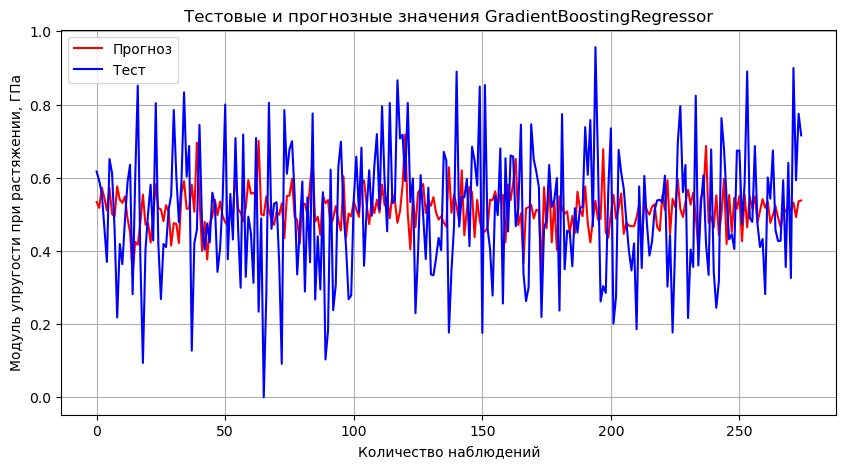

In [65]:
plt.figure(figsize = (10, 5))
plt.title("Тестовые и прогнозные значения GradientBoostingRegressor")
plt.plot(predictions_gbr, label = "Прогноз", color='red')
plt.plot(y_upr_test.values, label = "Тест", color='blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

#### Случайный лес

In [66]:
random_forest = RandomForestRegressor()
random_forest.fit(X_upr_train, y_upr_train)
predictions_rfr = random_forest.predict(X_upr_test)

parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

grid = GridSearchCV(random_forest, parametrs, cv=10)
grid.fit(X_upr_train, y_upr_train)

rfr = grid.best_params_
rfr

{'max_depth': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 10}

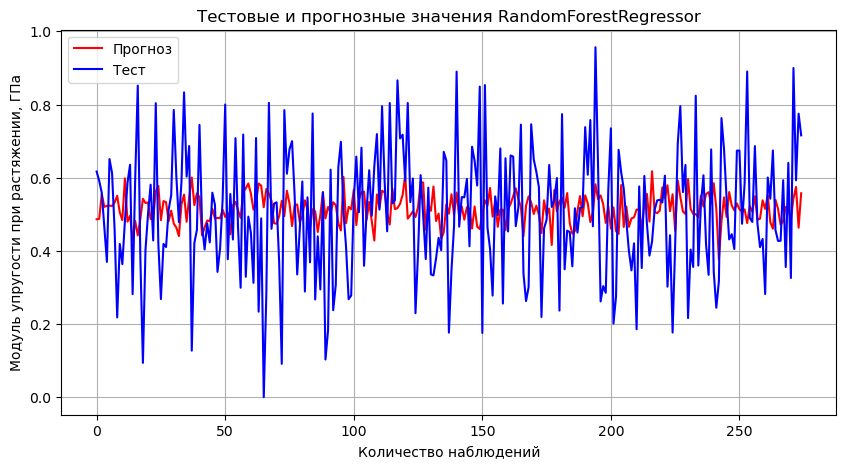

In [68]:
plt.figure(figsize = (10, 5))
plt.title("Тестовые и прогнозные значения RandomForestRegressor")
plt.plot(predictions_rfr, label = "Прогноз", color='red')
plt.plot(y_upr_test.values, label = "Тест", color='blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [69]:
print(l)
print(lr)
print(br)
print(dtr)
print(gbr)
print(rfr)

{'alpha': 0.01}
{'fit_intercept': True}
{'alpha_1': 0.01, 'alpha_2': 2.0, 'lambda_1': 1, 'lambda_2': 0.01}
{'max_depth': 1, 'min_samples_leaf': 6, 'min_samples_split': 4}
{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 4, 'n_estimators': 10}
{'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 10}


In [91]:
# Сравнение моделей с параметрами после поиска гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой
models_gs = {
    'Lasso': Lasso(alpha=0.01),
    'LinearRegression': LinearRegression(fit_intercept=True),
    'BayesianRidge': BayesianRidge(alpha_1=0.01, alpha_2=2.0, lambda_1=1, lambda_2=0.01),
    'DecisionTreeRegressor': DecisionTreeRegressor(max_depth=1, min_samples_leaf=6, min_samples_split=4, random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(learning_rate=0.1, max_depth=6, min_samples_split=4, n_estimators=10),
    'RandomForestRegressor': RandomForestRegressor(max_depth=1, min_samples_leaf=2, min_samples_split=8, n_estimators=10, random_state=42),
}
stat_gs = func_metrics(models_gs, X_upr_train, y_upr_train)
stat_gs

R2      RMSE       MAE      MSLE
Lasso                     -0.007955 -0.179417 -0.144730 -0.014487
LinearRegression          -0.039781 -0.182213 -0.146974 -0.014923
BayesianRidge             -0.023294 -0.180786 -0.145888 -0.014700
DecisionTreeRegressor     -0.039370 -0.182102 -0.146662 -0.014897
GradientBoostingRegressor -0.047730 -0.182925 -0.146455 -0.015039
RandomForestRegressor     -0.015930 -0.180144 -0.145170 -0.014608

Выводы: 
Можно сделать вывод, что подбирая гиперпараметры, можно немного улучшить предсказание выбранной модели.

Все модели крайне плохо описывают исходные данные - не удалось добиться положительного значения R2. Самый лучший результат дает коэффициент детерминации близкий к нулю, что соответствует базовой модели.

### Обучение нескольких моделей для прогноза модуля прочности при растяжении

In [71]:
# сделаем копию датасета для второй задачи (прогноз модуля прочности при растяжении)
model_ppr = df_norm.copy()

In [72]:
# Разделим датасет для - Модуля прочности при растяжении.
X_ppr = model_ppr.drop('Прочность при растяжении, МПа', axis=1)
y_ppr = model_ppr['Прочность при растяжении, МПа']

In [73]:
# Разделим датасет на тренировочную и тестовую выборки.
X_ppr_train, X_ppr_test, y_ppr_train, y_ppr_test = train_test_split(X_ppr, y_ppr, test_size=0.3, random_state=42)

In [74]:
# Посмотрим как разделидся датасет
print(X_ppr_test.shape)
print(X_ppr_train.shape)
print(y_ppr_test.shape)
print(y_ppr_train.shape)

(275, 12)
(639, 12)
(275,)
(639,)


In [75]:
# Выведем описательную статистику у train
X_ppr_train.describe().T

count      mean       std       min  \
Соотношение матрица-наполнитель       639.0  0.524566  0.176614  0.032081   
Плотность, кг/м3                      639.0  0.473024  0.173077  0.000000   
модуль упругости, ГПа                 639.0  0.457768  0.192539  0.001180   
Количество отвердителя, м.%           639.0  0.525198  0.179952  0.000000   
Содержание эпоксидных групп,%_2       639.0  0.490281  0.176960  0.026629   
Температура вспышки, С_2              639.0  0.503053  0.173777  0.000000   
Поверхностная плотность, г/м2         639.0  0.366362  0.209278  0.000825   
Модуль упругости при растяжении, ГПа  639.0  0.512803  0.179922  0.051250   
Потребление смолы, г/м2               639.0  0.482726  0.173081  0.000000   
Угол нашивки, град                    639.0  0.502347  0.500386  0.000000   
Шаг нашивки                           639.0  0.484823  0.174351  0.000000   
Плотность нашивки                     639.0  0.494308  0.163329  0.036371   

                                           25%       50%       75%       max  
Соотношение матрица-наполнитель       0.406138  0.516038  0.647844  1.000000  
Плотность, кг/м3                      0.349173  0.484803  0.583059  1.000000  
модуль упругости, ГПа                 0.322869  0.459021  0.591558  1.000000  
Количество отвердителя, м.%           0.404251  0.528263  0.649593  1.000000  
Содержание эпоксидных групп,%_2       0.368588  0.491015  0.619363  1.000000  
Температура вспышки, С_2              0.391858  0.500207  0.621207  1.000000  
Поверхностная плотность, г/м2         0.202196  0.343908  0.521838  1.000000  
Модуль упругости при растяжении, ГПа  0.392903  0.508355  0.630114  1.000000  
Потребление смолы, г/м2               0.365974  0.480571  0.591791  1.000000  
Угол нашивки, град                    0.000000  1.000000  1.000000  1.000000  
Шаг нашивки                           0.364615  0.486883  0.594113  0.998704  
Плотность нашивки                     0.394291  0.498085  0.598704  1.000000

In [76]:
# Напишем функцию для расчёта метрик.
def func_metrics(models, x, y):
    stat = pd.DataFrame() 
    cv = KFold(10, shuffle=True, random_state=42) 
    scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_squared_log_error']  
    for model_name, model in models.items():
        scores = cross_validate(model, x, y, cv=cv, scoring=scoring)
        # сохраняем среднии значения метрик.
        stat.loc[model_name, 'R2'] = scores['test_r2'].mean()
        stat.loc[model_name, 'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        stat.loc[model_name, 'MAE'] = scores['test_neg_mean_absolute_error'].mean()
        stat.loc[model_name, 'MSLE'] = scores['test_neg_mean_squared_log_error'].mean()
    return stat

In [77]:
# Сравнение моделей с параметрами по умолчанию
models_d = {
    'Lasso': Lasso(),
    'LinearRegression': LinearRegression(),
    'BayesianRidge': BayesianRidge(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
}
stat_d = func_metrics(models_d, X_ppr_train, y_ppr_train)
stat_d

R2      RMSE       MAE      MSLE
Lasso                     -0.012166 -0.171167 -0.134914 -0.013662
LinearRegression          -0.034749 -0.172838 -0.136233 -0.013894
BayesianRidge             -0.012725 -0.171212 -0.134929 -0.013668
DecisionTreeRegressor     -1.171508 -0.246919 -0.197997 -0.028408
GradientBoostingRegressor -0.156996 -0.182569 -0.144149 -0.015469
RandomForestRegressor     -0.067347 -0.175481 -0.138842 -0.014312

#### Лассо

In [78]:
lasso = Lasso()
lasso.fit(X_ppr_train, y_ppr_train)
predictions_l = lasso.predict(X_ppr_test)

parametrs = [
  {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.095, 0.1, 0.150, 0.2, 0.5, 1]
  }
]
grid = GridSearchCV(lasso, parametrs, cv=10)
grid.fit(X_ppr_train, y_ppr_train)
l = grid.best_params_
l

{'alpha': 0.001}

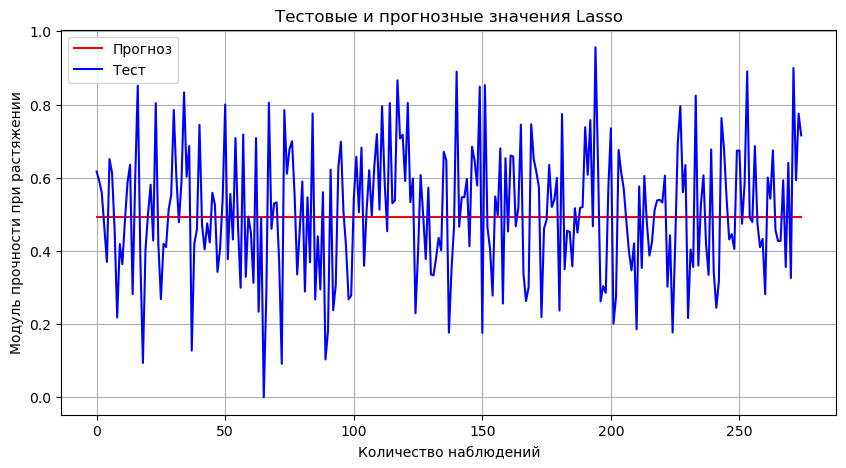

In [79]:
plt.figure(figsize = (10, 5))
plt.title("Тестовые и прогнозные значения Lasso")
plt.plot(predictions_l, label = "Прогноз", color='red')
plt.plot(y_upr_test.values, label = "Тест", color='blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль прочности при растяжении")
plt.legend()
plt.grid(True);

#### Линейная регрессия

In [80]:
# Посмотрим на линейную регрессию
linear_regression = LinearRegression()
linear_regression.fit(X_ppr_train, y_ppr_train)
predictions_lr = linear_regression.predict(X_ppr_test)

parametrs = {'fit_intercept':[True,False]}

grid = GridSearchCV(linear_regression, parametrs, cv=10)
grid.fit(X_ppr_train, y_ppr_train)
lr = grid.best_params_
lr

{'fit_intercept': True}

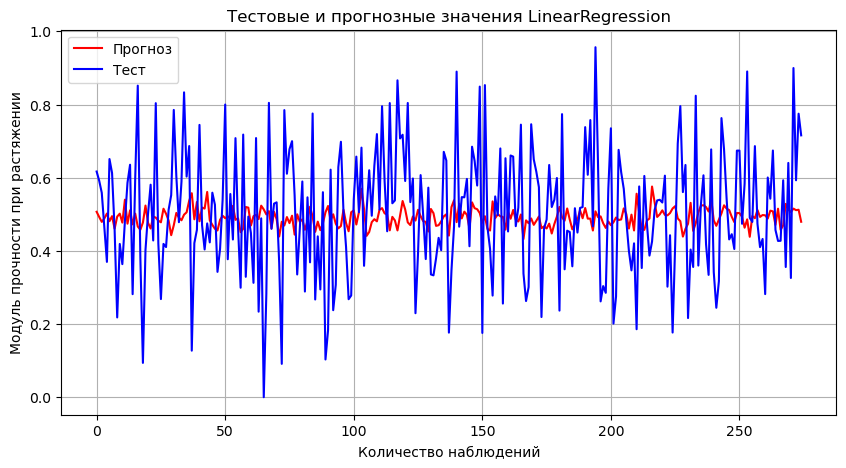

In [81]:
plt.figure(figsize = (10, 5))
plt.title("Тестовые и прогнозные значения LinearRegression")
plt.plot(predictions_lr, label = "Прогноз", color='red')
plt.plot(y_upr_test.values, label = "Тест", color='blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль прочности при растяжении")
plt.legend()
plt.grid(True);

#### Байесовский классификатор

In [82]:
bayes_regression = BayesianRidge()
bayes_regression.fit(X_ppr_train, y_ppr_train)
predictions_br = bayes_regression.predict(X_ppr_test)

parametrs = { 'alpha_1': np.linspace(0.01, 2, 20), # параметр формы для гамма-распределения
            'alpha_2': np.linspace(0.01, 2, 20), # параметр обратного масштаба (параметр скорости) для гамма-распределения
            'lambda_1':[0.01, 0.1, 1], # параметр формы для гамма-распределения
            'lambda_2':[0.01, 0.1, 1]} # параметр обратного масштаба (параметр скорости) для гамма-распределения

grid = GridSearchCV(bayes_regression, parametrs, cv=10)
grid.fit(X_ppr_train, y_ppr_train)
br = grid.best_params_
br

{'alpha_1': 0.01, 'alpha_2': 2.0, 'lambda_1': 1, 'lambda_2': 0.01}

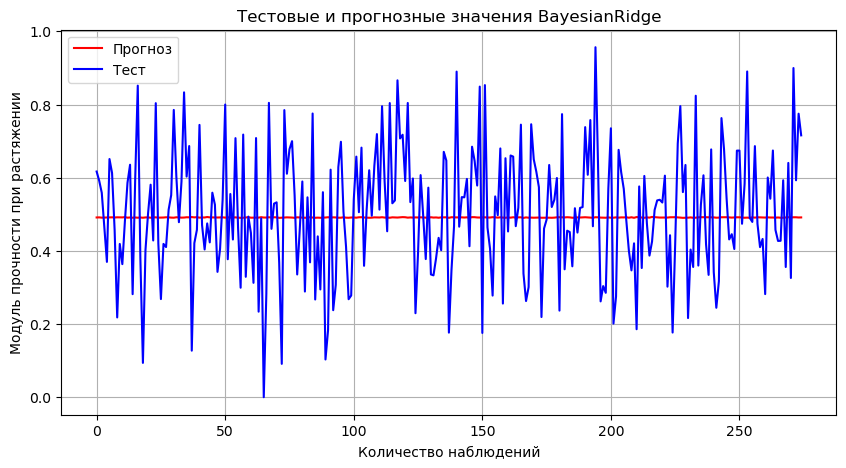

In [83]:
plt.figure(figsize = (10, 5))
plt.title("Тестовые и прогнозные значения BayesianRidge")
plt.plot(predictions_br, label = "Прогноз", color='red')
plt.plot(y_upr_test.values, label = "Тест", color='blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль прочности при растяжении")
plt.legend()
plt.grid(True);

#### Дерево решений

In [84]:
dt_regression = DecisionTreeRegressor()
dt_regression.fit(X_ppr_train, y_ppr_train)
predictions_dtr = dt_regression.predict(X_ppr_test)

parametrs = {'max_depth': np.arange(1, 10), # Максимальная глубина дерева.
            'min_samples_leaf':[1, 2, 4, 6], # Минимальное количество выборок, необходимое для конечного узла.
            'min_samples_split':[2,4,6],} # Минимальное количество выборок, необходимое для разделения внутреннего узла 
grid = GridSearchCV(dt_regression, parametrs, cv=10)
grid.fit(X_ppr_train, y_ppr_train)
dtr = grid.best_params_
dtr

{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}

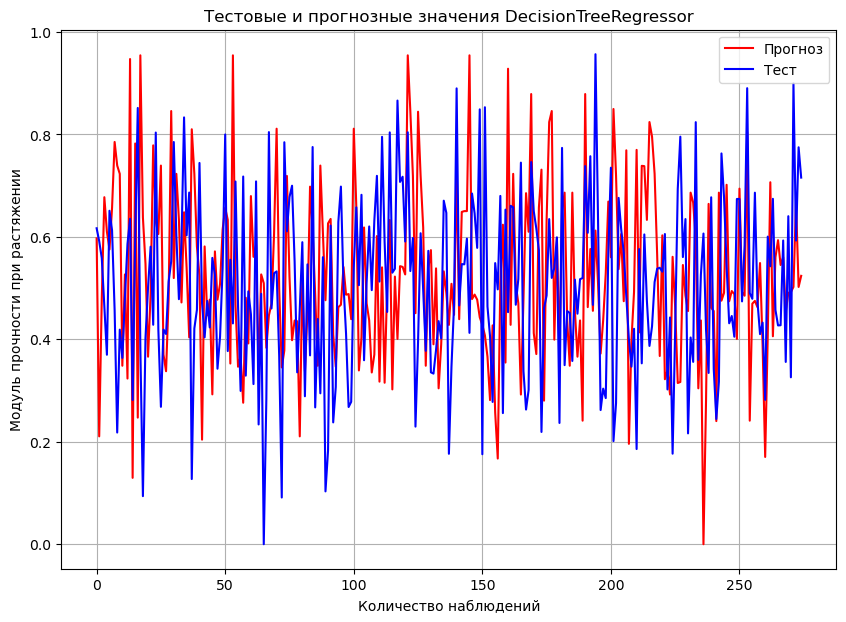

In [85]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения DecisionTreeRegressor")
plt.plot(predictions_dtr, label = "Прогноз", color='red')
plt.plot(y_upr_test.values, label = "Тест", color='blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль прочности при растяжении")
plt.legend()
plt.grid(True);

#### Градиентный бустинг

In [86]:
gb_regression = GradientBoostingRegressor()
gb_regression.fit(X_ppr_train, y_ppr_train)
predictions_gbr = gb_regression.predict(X_ppr_test)

parametrs = {'learning_rate': np.linspace(0.01, 1, 10), # Скорость обучения 
            'n_estimators': np.arange(10, 100, 10), # Количество этапов повышения для выполнения.
            'min_samples_split': [2, 4, 6], # Минимальное количество выборок, необходимое для разделения внутреннего узла
            'max_depth': [2, 4, 6],  # Максимальная глубина отдельных регрессионных оценок
            'learning_rate': [0.1, 0.2, 0.3]}
grid = GridSearchCV(gb_regression, parametrs, cv=10)
grid.fit(X_ppr_train, y_ppr_train)
gbr = grid.best_params_
gbr

{'learning_rate': 0.1,
 'max_depth': 2,
 'min_samples_split': 4,
 'n_estimators': 10}

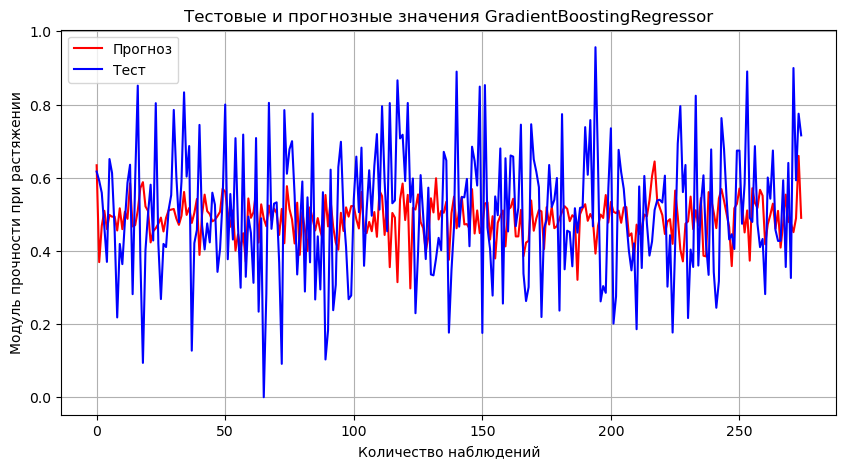

In [87]:
plt.figure(figsize = (10, 5))
plt.title("Тестовые и прогнозные значения GradientBoostingRegressor")
plt.plot(predictions_gbr, label = "Прогноз", color='red')
plt.plot(y_upr_test.values, label = "Тест", color='blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль прочности при растяжении")
plt.legend()
plt.grid(True);

#### Случайный лес

In [88]:
random_forest = RandomForestRegressor()
random_forest.fit(X_ppr_train, y_ppr_train)
predictions_rfr = random_forest.predict(X_ppr_test)

parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

grid = GridSearchCV(random_forest, parametrs, cv=10)
grid.fit(X_ppr_train, y_ppr_train)

rfr = grid.best_params_
rfr

{'max_depth': 1,
 'min_samples_leaf': 6,
 'min_samples_split': 6,
 'n_estimators': 10}

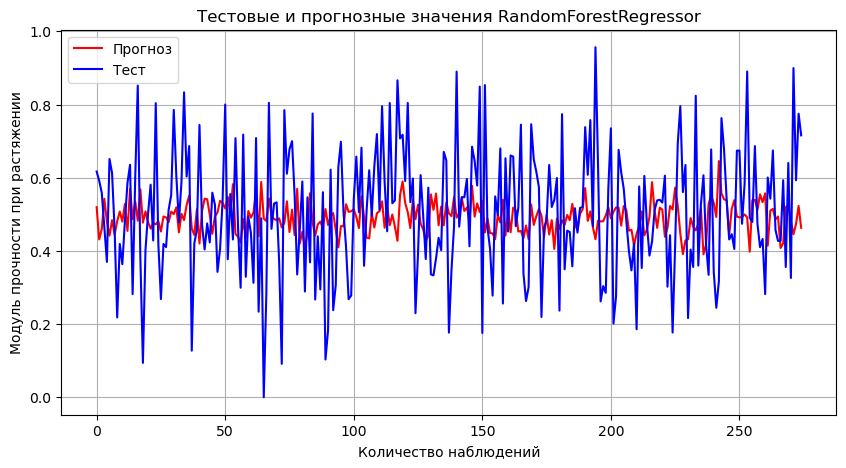

In [89]:
plt.figure(figsize = (10, 5))
plt.title("Тестовые и прогнозные значения RandomForestRegressor")
plt.plot(predictions_rfr, label = "Прогноз", color='red')
plt.plot(y_upr_test.values, label = "Тест", color='blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль прочности при растяжении")
plt.legend()
plt.grid(True);

In [90]:
print(l)
print(lr)
print(br)
print(dtr)
print(gbr)
print(rfr)

{'alpha': 0.001}
{'fit_intercept': True}
{'alpha_1': 0.01, 'alpha_2': 2.0, 'lambda_1': 1, 'lambda_2': 0.01}
{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 4, 'n_estimators': 10}
{'max_depth': 1, 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 10}


In [92]:
# Сравнение моделей с параметрами после поиска гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой
models_gs = {
    'Lasso': Lasso(alpha=0.001),
    'LinearRegression': LinearRegression(fit_intercept=True),
    'BayesianRidge': BayesianRidge(alpha_1=0.01, alpha_2=2.0, lambda_1=1, lambda_2=0.01),
    'DecisionTreeRegressor': DecisionTreeRegressor(max_depth=1, min_samples_leaf=1, min_samples_split=2, random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(learning_rate=0.1, max_depth=2, min_samples_split=4, n_estimators=10),
    'RandomForestRegressor': RandomForestRegressor(max_depth=1, min_samples_leaf=6, min_samples_split=6, n_estimators=10, random_state=42),
}
stat_gs = func_metrics(models_gs, X_ppr_train, y_ppr_train)
stat_gs


R2      RMSE       MAE      MSLE
Lasso                     -0.019039 -0.171654 -0.135095 -0.013728
LinearRegression          -0.034749 -0.172838 -0.136233 -0.013894
BayesianRidge             -0.021610 -0.171860 -0.135291 -0.013755
DecisionTreeRegressor     -0.005487 -0.170625 -0.134638 -0.013593
GradientBoostingRegressor -0.025983 -0.172240 -0.135793 -0.013820
RandomForestRegressor     -0.015967 -0.171482 -0.134876 -0.013713

Выводы: Можно сделать вывод, что подбирая гиперпараметры, можно улучшить предсказание выбранной модели.

Все модели крайне плохо описывают исходные данные - не удалось добиться положительного значения R2.
Самый лучший результат дает коэффициент детерминации близкий к нулю, что соответствует базовой модели.

### Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель. 

In [93]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [94]:
# сделаем копию датасета
model_smn = df_norm.copy()

In [95]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [96]:
# Разделим датасет для - Соотношение матрица-наполнитель.
X_smn = model_smn.drop('Соотношение матрица-наполнитель', axis=1)
y_smn = model_smn['Соотношение матрица-наполнитель']

In [97]:
# Разделим датасет на тренировочную и тестовую выборки.
X_smn_train, X_smn_test, y_smn_train, y_smn_test = train_test_split(X_smn, y_smn, test_size=0.3, random_state=42)

In [98]:
# Посмотрим как разделидся датасет
print(X_smn_test.shape)
print(X_smn_train.shape)
print(y_smn_test.shape)
print(y_smn_train.shape)

(275, 12)
(639, 12)
(275,)
(639,)


Epoch 1/30
3/3 [==============================] - 1s 153ms/step - loss: 0.0376 - MAE: 0.1547 - val_loss: 0.0362 - val_MAE: 0.1518
Epoch 2/30
3/3 [==============================] - 0s 24ms/step - loss: 0.0358 - MAE: 0.1510 - val_loss: 0.0347 - val_MAE: 0.1489
Epoch 3/30
3/3 [==============================] - 0s 24ms/step - loss: 0.0343 - MAE: 0.1483 - val_loss: 0.0336 - val_MAE: 0.1468
Epoch 4/30
3/3 [==============================] - 0s 32ms/step - loss: 0.0334 - MAE: 0.1464 - val_loss: 0.0329 - val_MAE: 0.1457
Epoch 5/30
3/3 [==============================] - 0s 24ms/step - loss: 0.0328 - MAE: 0.1454 - val_loss: 0.0325 - val_MAE: 0.1452
Epoch 6/30
3/3 [==============================] - 0s 26ms/step - loss: 0.0325 - MAE: 0.1453 - val_loss: 0.0324 - val_MAE: 0.1452
Epoch 7/30
3/3 [==============================] - 0s 24ms/step - loss: 0.0323 - MAE: 0.1451 - val_loss: 0.0323 - val_MAE: 0.1454
Epoch 8/30
3/3 [==============================] - 0s 25ms/step - loss: 0.0323 - MAE: 0.1454 - va

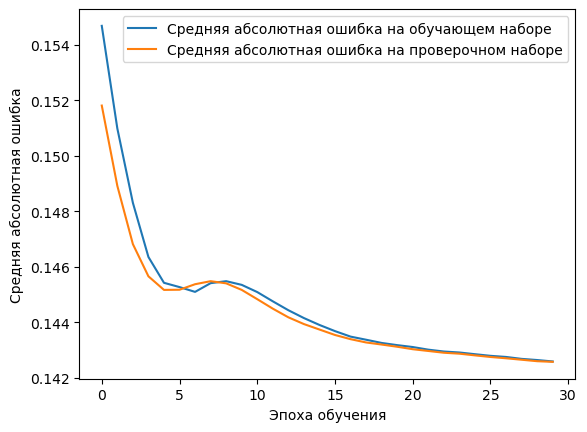

In [99]:
model = Sequential()
# Создаем слои
model.add(Dense(8, activation='tanh'))
model.add(Dense(8, activation='tanh')) 
model.add(Dense(1, activation = 'sigmoid')) # выходной слой
model.compile(loss = 'MSE', optimizer = 'adam', metrics = ['MAE'])

history = model.fit(X_smn_train,
                    y_smn_train,
                    batch_size=250,
                    epochs=30,
                    validation_data=(X_smn_train,  y_smn_train),
                    verbose = 1)
model.summary()

# Рисуем графики ошибки
plt.plot(history.history['MAE'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_MAE'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

9/9 [==============================] - 0s 3ms/step


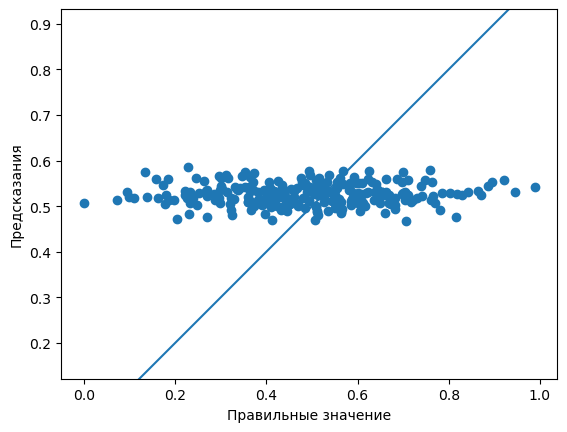

In [100]:
# Делаем прогноз. 
pred = model.predict(X_smn_test).flatten() 

# Разброс предсказаний может показать перекос, если есть
plt.scatter(y_smn_test, pred) 
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([0, 1], [0, 1])
plt.show()

### Сохраниение модели для приложения

In [101]:
import pickle

In [102]:
pickle.dump(model, open('ns_model.pkl','wb'))

In [103]:
model_load = pickle.load(open('ns_model.pkl','rb'))

In [104]:
model_load.predict(X_smn_test)

9/9 [==============================] - 0s 1ms/step


array([[0.53156507],
       [0.5128819 ],
       [0.5391469 ],
       [0.53214943],
       [0.5318832 ],
       [0.5061446 ],
       [0.50185037],
       [0.50604403],
       [0.5427299 ],
       [0.5263031 ],
       [0.5148878 ],
       [0.50346804],
       [0.5108677 ],
       [0.526826  ],
       [0.55191344],
       [0.5592966 ],
       [0.5345097 ],
       [0.5215359 ],
       [0.5258508 ],
       [0.5287524 ],
       [0.5313768 ],
       [0.5318027 ],
       [0.51290363],
       [0.51713645],
       [0.53798103],
       [0.56270283],
       [0.53643614],
       [0.5239467 ],
       [0.51899165],
       [0.5320541 ],
       [0.53562844],
       [0.51718503],
       [0.5013767 ],
       [0.5212789 ],
       [0.52364296],
       [0.50692594],
       [0.5322895 ],
       [0.53513104],
       [0.5185424 ],
       [0.5243745 ],
       [0.49991006],
       [0.5774307 ],
       [0.5587279 ],
       [0.52021664],
       [0.50985366],
       [0.5056258 ],
       [0.50837135],
       [0.523